# Loading file from previous code

In [1]:
!pip install keras==3.0.0
!pip install tensorflow==2.15
import keras
print(keras.version)

ERROR: Could not find a version that satisfies the requirement tensorflow==2.15 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0)
ERROR: No matching distribution found for tensorflow==2.15


<function version at 0x000001E9299FEFC0>


In [2]:
# python.exe -m pip install --upgrade pip

In [3]:
!pip install tensorflow    

In [4]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [5]:
!pip install keras

# Model Building

In [6]:

from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


# Model Training

In [7]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [8]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.keras', monitor='val_loss', verbose=0, save_best_only=True, mode='auto')
history=model.fit(train_data,train_target,epochs=5,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 44s 485ms/step - accuracy: 0.5472 - loss: 0.6974 - val_accuracy: 0.7478 - val_loss: 0.4847
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 47s 542ms/step - accuracy: 0.7417 - loss: 0.4947 - val_accuracy: 0.8207 - val_loss: 0.3858
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 51s 583ms/step - accuracy: 0.8380 - loss: 0.3693 - val_accuracy: 0.8732 - val_loss: 0.3033
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 48s 561ms/step - accuracy: 0.8752 - loss: 0.2964 - val_accuracy: 0.8878 - val_loss: 0.2811
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 47s 550ms/step - accuracy: 0.9092 - loss: 0.2113 - val_accuracy: 0.9067 - val_loss: 0.2300


# Graph of loss

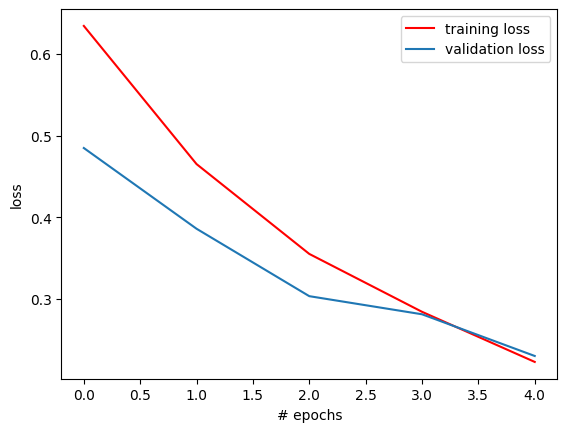

In [9]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Graph of Accuracy

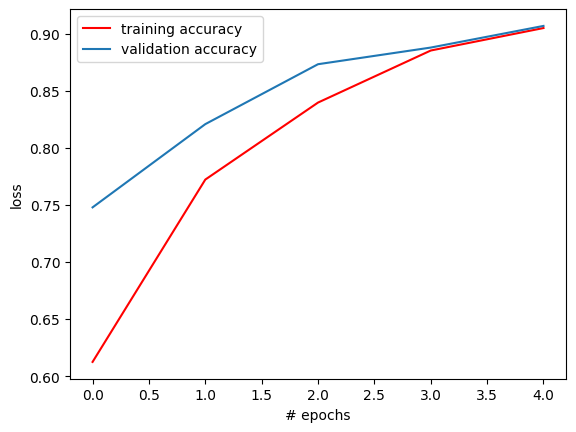

In [10]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Test Accuracy

In [14]:
import tensorflow as tf

# Load the pre-trained model (assuming it's saved in HDF5 format)
best_model = tf.keras.models.load_model('model-005.h5')

# Evaluate the model on the test data
test_loss, test_accuracy = best_model.evaluate(test_data, test_target)

# Print the test accuracy with clear labeling
print('Test Accuracy:', test_accuracy)


OSError: Unable to synchronously open file (file signature not found)

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
# Make predictions on test data
predictions = model.predict(test_data)
# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
# Convert test target to class labels
true_labels = np.argmax(test_target, axis=1)
# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

# Classification Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cr = classification_report(
      np.argmax(model.predict(test_data), axis=1), 
      np.argmax(test_target, axis = 1)
     )
print(cr)

# Model Summary

In [ ]:
model.summary()